# mushroom classification

develop a model to classify whether a mushroom is edible or poisonous.


## dataset

given on [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification/data).



## eda



In [120]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


data = pd.read_csv("mushrooms.csv")
mushrooms = data.copy()

mushrooms.head()




,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [121]:
mushrooms.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [122]:
print(f"There are {mushrooms.shape[0]} rows in this dataset.")
print(f"There are {mushrooms.shape[1]} columns in this dataset.")

There are 8124 rows in this dataset.
There are 23 columns in this dataset.


In [123]:
print(mushrooms.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [124]:
mushrooms.duplicated().sum()


0

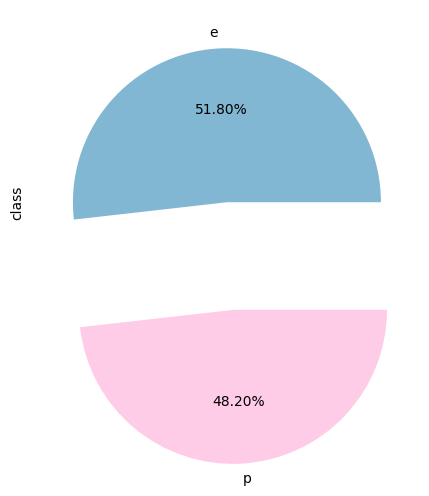

In [125]:
ax = mushrooms['class'].value_counts().plot.pie(explode=[0, 0.7],
                                                colors=["#81b7d2", "#ffcce7"],
                                                autopct='%.2f%%',
                                                figsize=(15, 5)
)



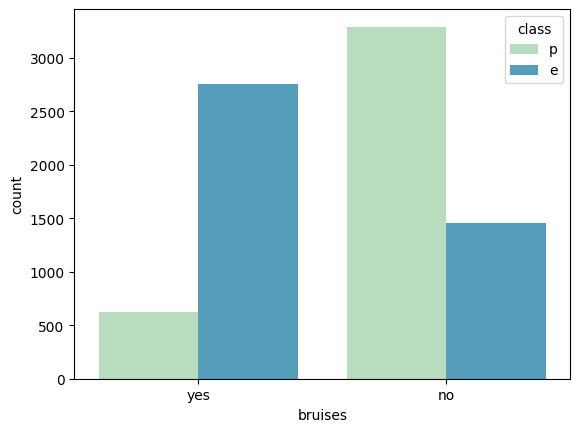

In [126]:
plt.figure()
sb.countplot(x='bruises', hue='class', data=mushrooms, palette='GnBu')
plt.xticks([0,1], ["yes","no"])
plt.show()

## preprocessing


In [127]:
mushrooms = mushrooms.astype('category')

y = mushrooms['class']
X = mushrooms.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_train



array([['p'],
       ['e'],
       ['p'],
       ...,
       ['e'],
       ['p'],
       ['e']], dtype=object)

In [128]:

from sklearn.preprocessing import OrdinalEncoder
  
encoder = OrdinalEncoder() 
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


pd.DataFrame(y_train)


,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
5681,1.0
5682,0.0
5683,0.0
5684,1.0


poisonous ones are encoded as 1 while edible mushrooms are encoded as 0.

In [129]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_train)

X_train = encoder.transform(X_train).toarray()
X_test = encoder.transform(X_test).toarray()

X_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## model

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


decisiont = DecisionTreeClassifier()
randomf = RandomForestClassifier()
gradientb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

models = [decisiont, randomf, gradientb, knn]



from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score


def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    cross_val_accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv = 10).mean()
    model.fit(X_t, y_t)
    preds = model.predict(X_v)

    print(f"model: {model}")
    print(f"accuracy: {accuracy_score(y_test, preds)}")
    print(f"recall: {recall_score(y_test, preds, zero_division=1)}")
    print(f"f1 score: {f1_score(y_test, preds, zero_division=1)}")
    print(f"precision: {precision_score(y_test, preds, zero_division=1)}")
    


for i in range(0, len(models)):
    m = score_model(models[i])



model: DecisionTreeClassifier()
accuracy: 1.0
recall: 1.0
f1 score: 1.0
precision: 1.0
model: RandomForestClassifier()
accuracy: 1.0
recall: 1.0
f1 score: 1.0
precision: 1.0
model: GradientBoostingClassifier()
accuracy: 1.0
recall: 1.0
f1 score: 1.0
precision: 1.0
model: KNeighborsClassifier()
accuracy: 1.0
recall: 1.0
f1 score: 1.0
precision: 1.0


## hyperparameter tuning



In [131]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': randint(50,500),
            'max_depth': randint(1,20)}


rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                param_distributions = param_dist, 
                                n_iter=5, 
                                cv=5)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print('best hyperparameters:', rand_search.best_params_)


preds = best_rf.predict(X_test)


print(f"model: {rf}")
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"recall: {recall_score(y_test, preds, zero_division=1)}")
print(f"f1 score: {f1_score(y_test, preds, zero_division=1)}")
print(f"precision: {precision_score(y_test, preds, zero_division=1)}")
    


best hyperparameters: {'max_depth': 19, 'n_estimators': 479}
model: RandomForestClassifier()
accuracy: 1.0
recall: 1.0
f1 score: 1.0
precision: 1.0


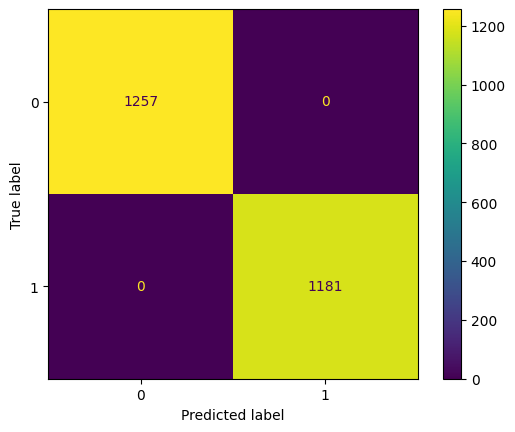

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm2 = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot()
plt.show()
